## Construct a perceptron class

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

class Perceptron:
    def __init__(self, N):
        self.N = N
        x11, x21, x12, x22 = [random.uniform(-1, 1) for i in range(4)]
        self.Wf = np.array([x12*x21-x11*x22, (x22-x21)/(x22*x21), (x11-x12)/(x11*x12)])
        self.X = self.generate_data(N)
        self.W = np.zeros(3)
        self.mispt = []
        
    def generate_data(self, N):
        X = []
        for i in range(N):
            x1, x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([-1, x1, x2])
            y = int(np.sign(self.Wf.T.dot(x)))
            X.append((x, y))
        return X
    
    def plot(self):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        
        # Plot seperate line
        x = np.linspace(-1, 1)
        a = -self.Wf[1]/self.Wf[2]
        b =  self.Wf[0]/self.Wf[2]
        plt.plot(x, a*x+b, 'g-')
        
        # Plot perceptron
        if self.W[2]:
            a = -self.W[1]/self.W[2]
            b =  self.W[0]/self.W[2]
            plt.plot(x, a*x+b, 'b-')
        
        cols = {1: 'r', -1: 'b'}
        for x, y in self.X:
            plt.plot(x[1], x[2], cols[y]+'o')
            
    def check_err(self):
        w = self.W
        self.mispt = []
        for x, y in self.X:
            if int(np.sign(w.T.dot(x))) != y:
                self.mispt.append((x, y))
        return len(self.mispt)
        
    def pla(self):
        w = self.W
        it = 0
        n_err = self.check_err()
        while n_err != 0:
            it += 1
            x, y = self.mispt[random.randrange(0,n_err)]
            w += y*x
            self.W = w
            n_err = self.check_err()
        self.plot()
        

## Initialize a perceptron and plot the data

The green line is randomly generated to seperate dots that construct a linear seperable dataset.

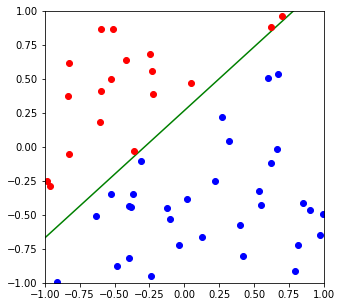

In [2]:
p = Perceptron(50)
p.plot()

## Execute perceptron learning algorithm

The blue line is the final result of PLA.

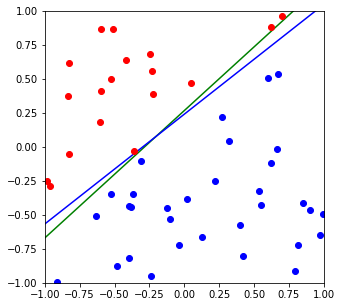

In [3]:
p.pla()